<h1 style='color:green;'><center>Amazon Sales Data</center></h1>
This dataset contains information on #K+ Amazon products, including their ratings, reviews, and other details.

# Features:


- product_id: Unique identifier for each product

- product_name: Name of the product

- category: Category of the product

- discounted_price: Discounted price of the product

- actual_price: Actual price of the product

- discount_percentage: Percentage of discount for the product

- rating: Rating of the product (#-5)

- rating_count: Number of people who voted for the Amazon rating

- about_product: Description about the product

- user_id: ID of the user who wrote the review

- user_name: Name of the user who wrote the review

- review_id: ID of the user review

- review_title: Short review

- review_content: Long review

- img_link: Image link of the product

- product_link: Qfficial website link of the product


<h1 style='color: blue;'><center>EDA</center></h1>

<h1 style='color: green;'><center>Spotify DataSet</center></h1>

# Description of the Dataset:

The dataset titled "Spotify Data: Popular Hip-hop Artists and Tracks" provides a curated collection of
approximately 500 entries showcasing the vibrant realm of hip-hop music. These entries meticulously compile
the most celebrated hip-hop tracks and artists, reflecting their significant influence on the genre's landscape.
Each entry not only highlights the popularity and musical composition of the tracks but also underscores the
creative prowess of the artists and their profound impact on global listeners.

# Application in Data Science:

This dataset serves as a valuable resource for various data science explorations. Analysts can delve into trend
analysis to discern the popularity dynamics of hit hip-hop tracks over recent years. Additionally, the dataset
enables network analysis to uncover collaborative patterns among top artists, shedding light on the genre's
evolving collaborative landscape. Furthermore, it facilitates the development of predictive models aimed at
forecasting track popularity based on diverse features, offering insights for artists, producers, and marketers.

<h1 style='color: blue;'><center>EDA</center></h1>

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Questions:

<h3>1.Load the dataframe and ensure data quality by checking for missing values and duplicate rows.
 Handle missing values and remove duplicate rows if necessary.</h3>
<p><b>Answer</b></p>

In [11]:
## Loading the data into dataframe and checking the data quality

df=pd.read_csv('spotify.csv')
df.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [6]:
## shape of the dataset
df.shape

(440, 5)

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Popularity,440.0,75.736364,9.886534,29.0,70.0,77.0,83.00,97.0
Duration (ms),440.0,206810.040909,53576.930289,81666.0,172778.5,201866.0,235119.75,501648.0


In [4]:
## Checking the missing values
df.isna().sum()

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

In [5]:
## Checking the duplicates values
duplicate_records=df.duplicated().sum()
print(f'Duplicate values in the following dataset: {duplicate_records}')

## We keep the duplicate records for this case, becasue if we reomove these dupicate value we lost data and one more thing to know that one artist can have more than one songs.


Duplicate values in the following dataset: 27


<h3>2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.</h3>
<p><b>Answer</b></p>

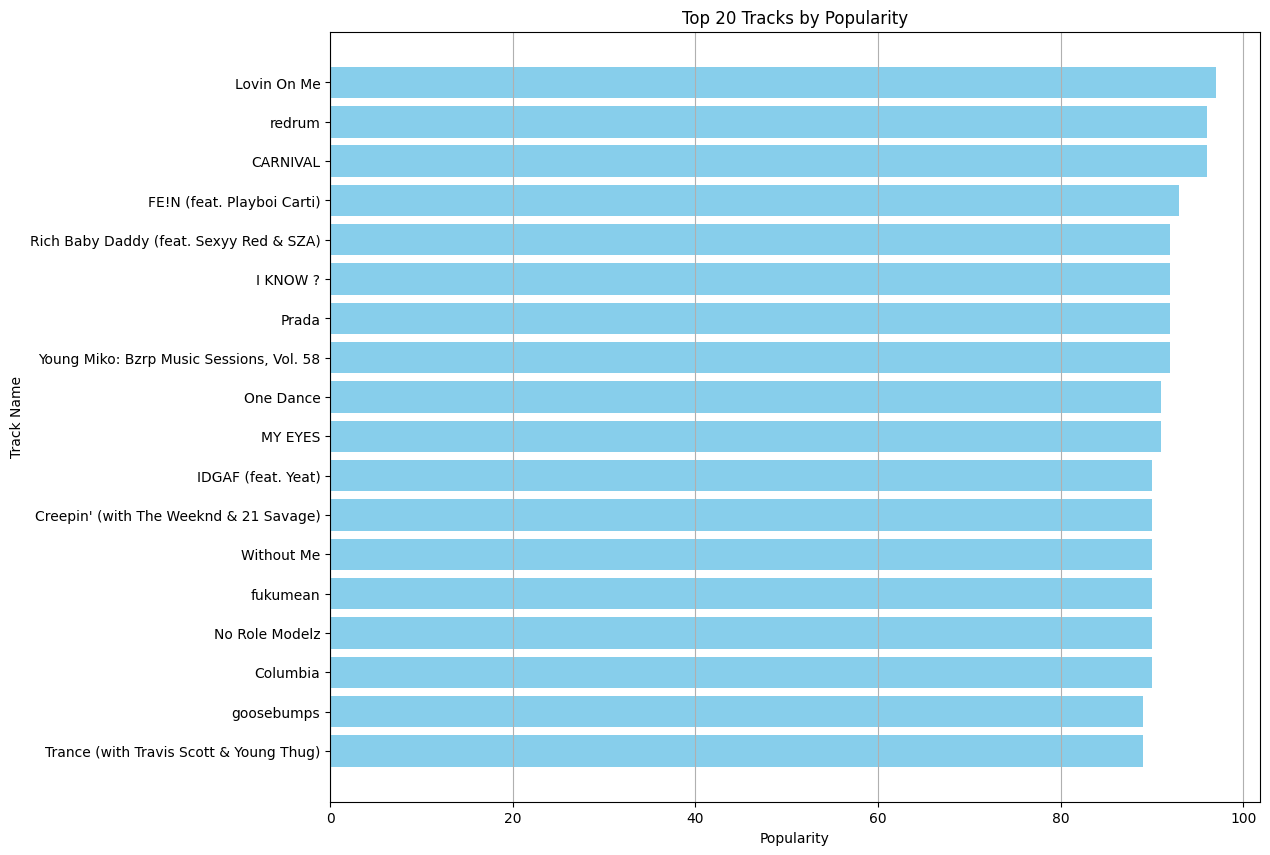

In [39]:
# Select a subset of tracks (top 20 most popular tracks)
# Selecting only top 20 track, because it hard to visualize and analyize all track by their popularity.
top_tracks = df.nlargest(20, 'Popularity')

# Plot bar chart of track popularity
plt.figure(figsize=(12, 10))
plt.barh(top_tracks['Track Name'], top_tracks['Popularity'], color='skyblue')
plt.title('Top 20 Tracks by Popularity')
plt.xlabel('Popularity')
plt.ylabel('Track Name')
plt.gca().invert_yaxis()  # Invert y-axis to have the most popular track at the top
plt.grid(True, axis='x')
plt.show()


<h3>3.Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.</h3>
<p><b>Answer</b></p>


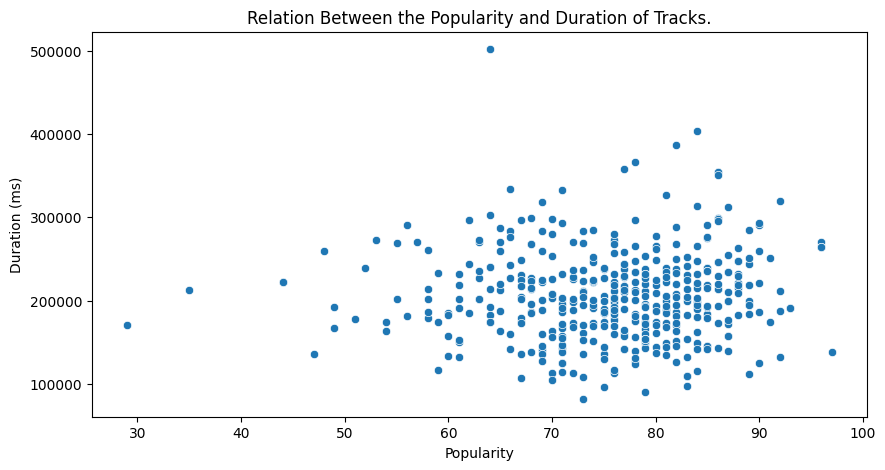

In [41]:


plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x=df['Popularity'], y=df['Duration (ms)'])
plt.title('Relation Between the Popularity and Duration of Tracks.')
plt.xlabel('Popularity')
plt.ylabel('Duration (ms)')
plt.show()

<h3>4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist
using a countplot.
</h3>
<p><b>Answer</b></p>

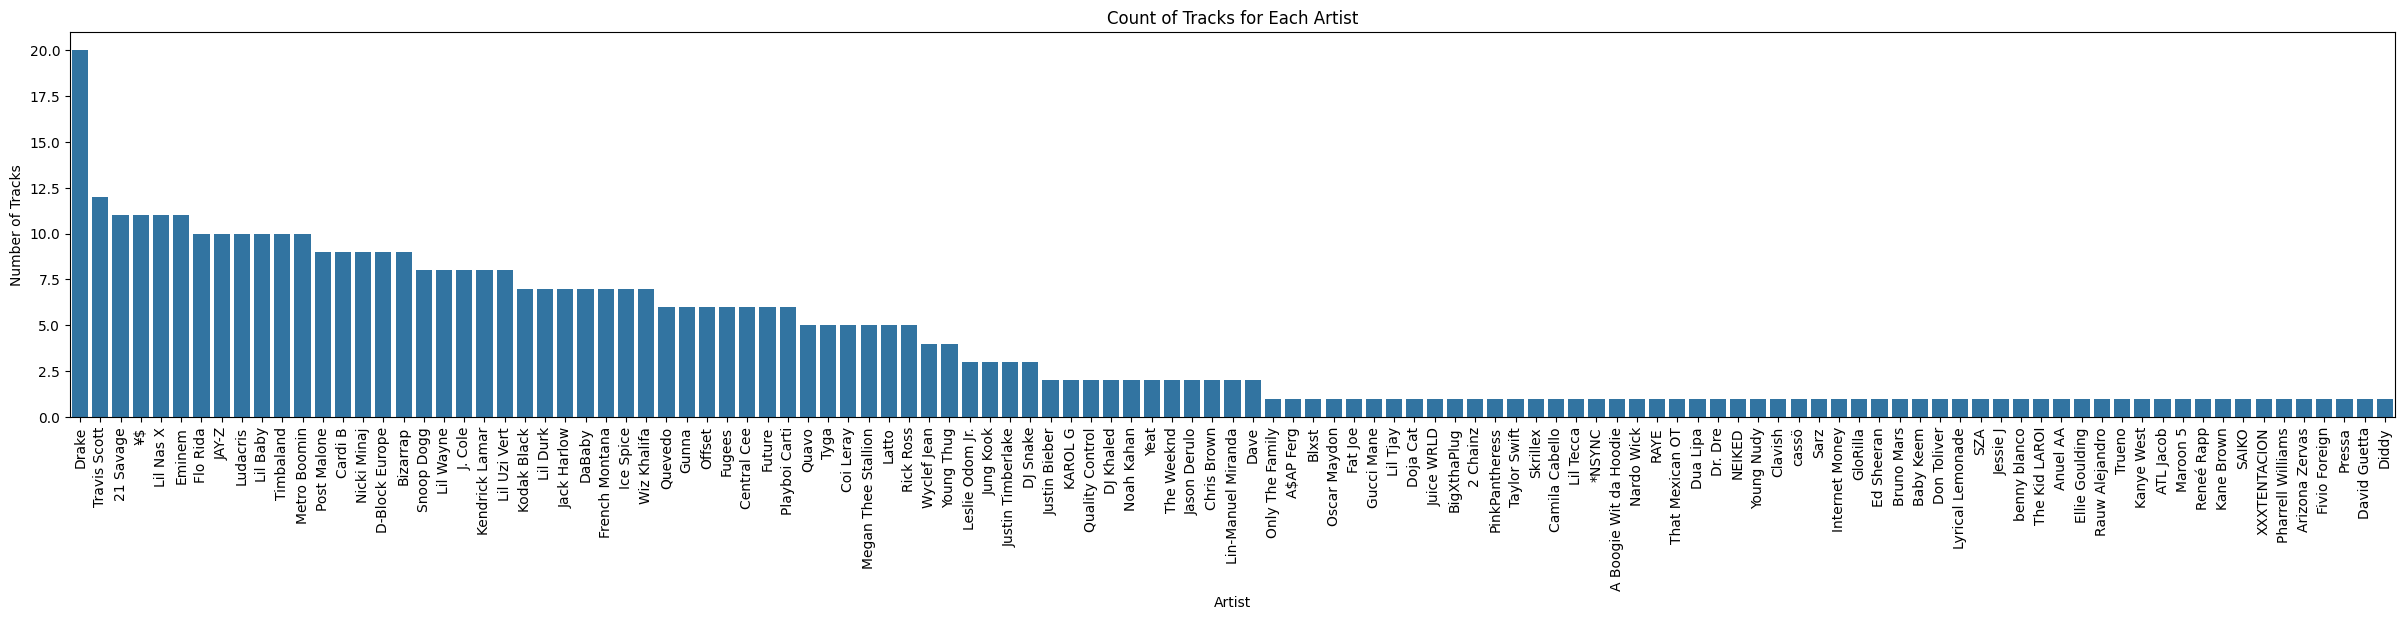

In [59]:
artist_track_counts = df['Artist'].value_counts()

plt.figure(figsize=(30, 5))
sns.countplot(x='Artist', data=df, order=artist_track_counts.index)
plt.title('Count of Tracks for Each Artist')
plt.xlabel('Artist')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=90)
plt.show()

<h3>5.What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.</h3>
<p><b>Answer</b></p>

In [77]:
##  the top 5 least popular tracks in the dataset

least_popular_tracks = df.nsmallest(5, 'Popularity')
least_popular_tracks.iloc[:,:2]

,Artist,Track Name
207,Pressa,Attachments (feat. Coi Leray)
231,Justin Bieber,Intentions
413,French Montana,Splash Brothers
435,French Montana,Splash Brothers
225,Lil Baby,On Me - Remix


<h3>6.Among the top 5 most popular artists, which artist has the highest popularity on average?
 Calculate and display the average popularity for each artist.</h3>
 <p><b>Answer</b></p>

In [78]:
## Among the top 5 most popular artists, which artist has the highest popularity on average?

Top_5_artists=df.nlargest(5, "Popularity")
Top_5_artists

,Artist,Track Name,Popularity,Duration (ms),Track ID
40,Jack Harlow,Lovin On Me,97,138411,4xhsWYTOGcal8zt0J161CU
70,21 Savage,redrum,96,270697,52eIcoLUM25zbQupAZYoFh
260,¥$,CARNIVAL,96,264324,3w0w2T288dec0mgeZZqoNN
280,¥$,CARNIVAL,96,264324,3w0w2T288dec0mgeZZqoNN
30,Travis Scott,FE!N (feat. Playboi Carti),93,191700,42VsgItocQwOQC3XWZ8JNA


Artist Jack Harlow has the highest popularity on average

<h3>7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.</h3>
<p><b>Answer</b></p>

In [79]:
# Find the top 5 artists with the highest number of tracks
top_artists = df['Artist'].value_counts().head(5).index
print("Top 5 Artists:", top_artists)

# Initialize a dictionary to store the most popular track for each artist
most_popular_tracks = {}

# Iterate over each top artist
for artist in top_artists:
    # Filter tracks by the current artist
    artist_tracks = df[df['Artist'] == artist]
    # Find the track with the highest popularity for the current artist
    most_popular_track = artist_tracks.loc[artist_tracks['Popularity'].idxmax()]
    # Store the track name in the dictionary
    most_popular_tracks[artist] = most_popular_track['Track Name']

# Display the most popular track for each of the top 5 artists
for artist, track in most_popular_tracks.items():
    print(f"Most popular track for {artist}: {track}")

Top 5 Artists: Index(['Drake', 'Travis Scott', '21 Savage', '¥$', 'Lil Nas X'], dtype='object', name='Artist')
Most popular track for Drake: Rich Baby Daddy (feat. Sexyy Red & SZA)
Most popular track for Travis Scott: FE!N (feat. Playboi Carti)
Most popular track for 21 Savage: redrum
Most popular track for ¥$: CARNIVAL
Most popular track for Lil Nas X: THATS WHAT I WANT


<h3>8.Visualize relationships between multiple numerical variables simultaneously using a pair plot.
</h3>
<p><b>Answer</b></p>

<Figure size 2000x500 with 0 Axes>

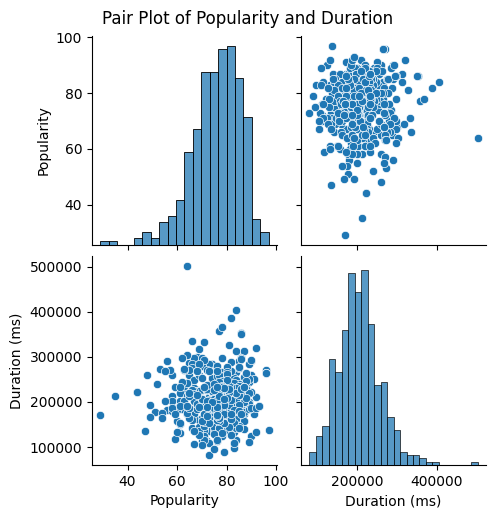

In [93]:
# Select the numerical columns
numerical_columns = df[['Popularity', 'Duration (ms)']]

# Create a pair plot
plt.figure(figsize=(20,5))
sns.pairplot(numerical_columns)
plt.suptitle('Pair Plot of Popularity and Duration', y=1.02)
plt.show()

<h3>9.Does the duration of tracks vary significantly across different artists?
Explore this visually using a box plot or violin plot.
</h3>
<p><b>Answer</b></p>

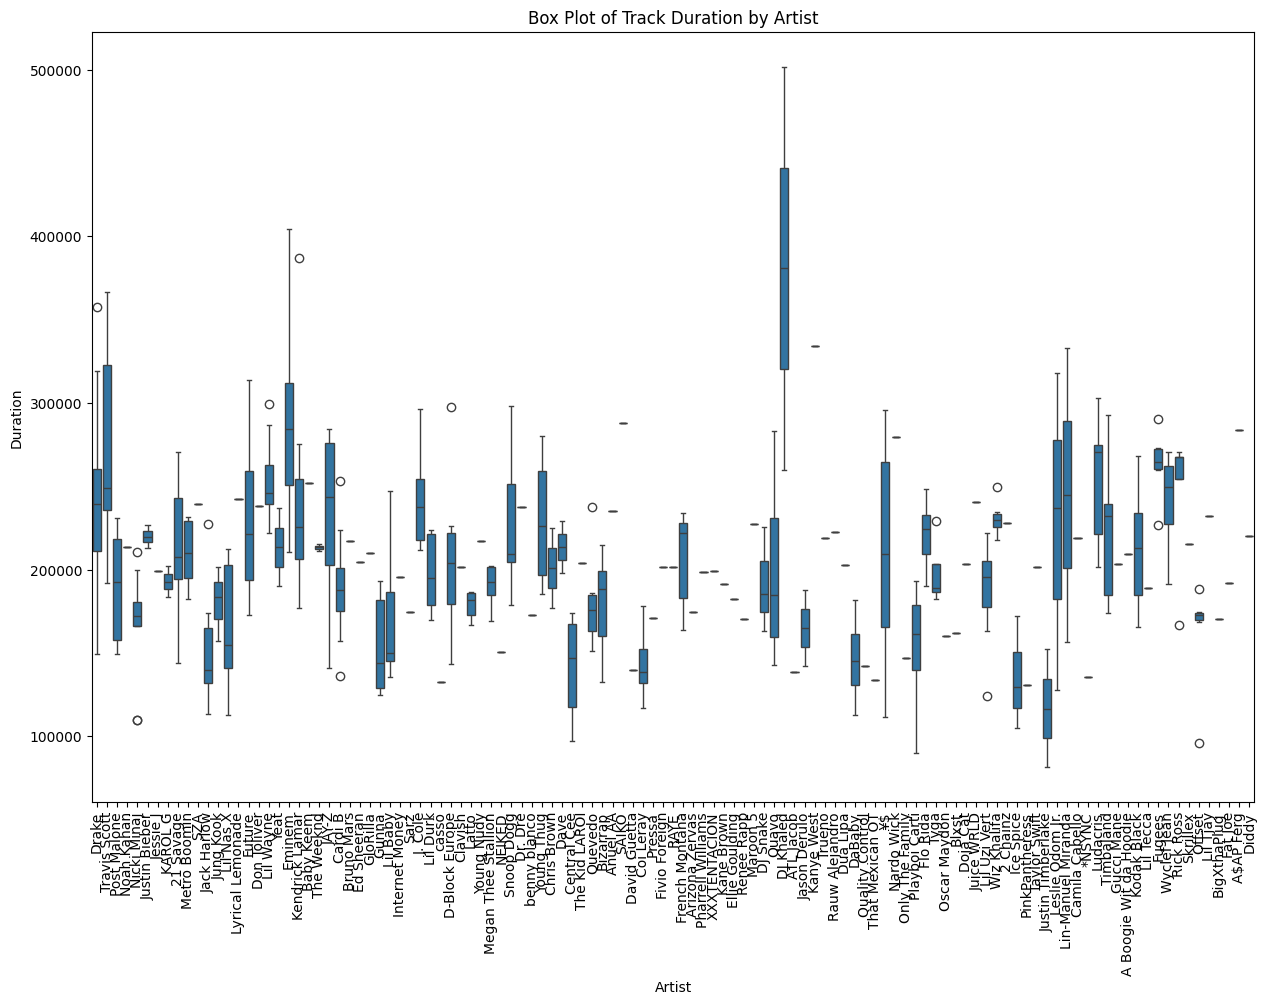

In [95]:
# Create a box plot of track duration by artist
plt.figure(figsize=(15, 10))
sns.boxplot(x='Artist', y='Duration (ms)', data=df)
plt.title('Box Plot of Track Duration by Artist')
plt.xlabel('Artist')
plt.ylabel('Duration')
plt.xticks(rotation=90)
plt.show()


<h3>10.How does the distribution of track popularity vary for different artists?
Visualize this using a swarm plot or a violin plot.</h3>
<p><b>Answer</b></p>

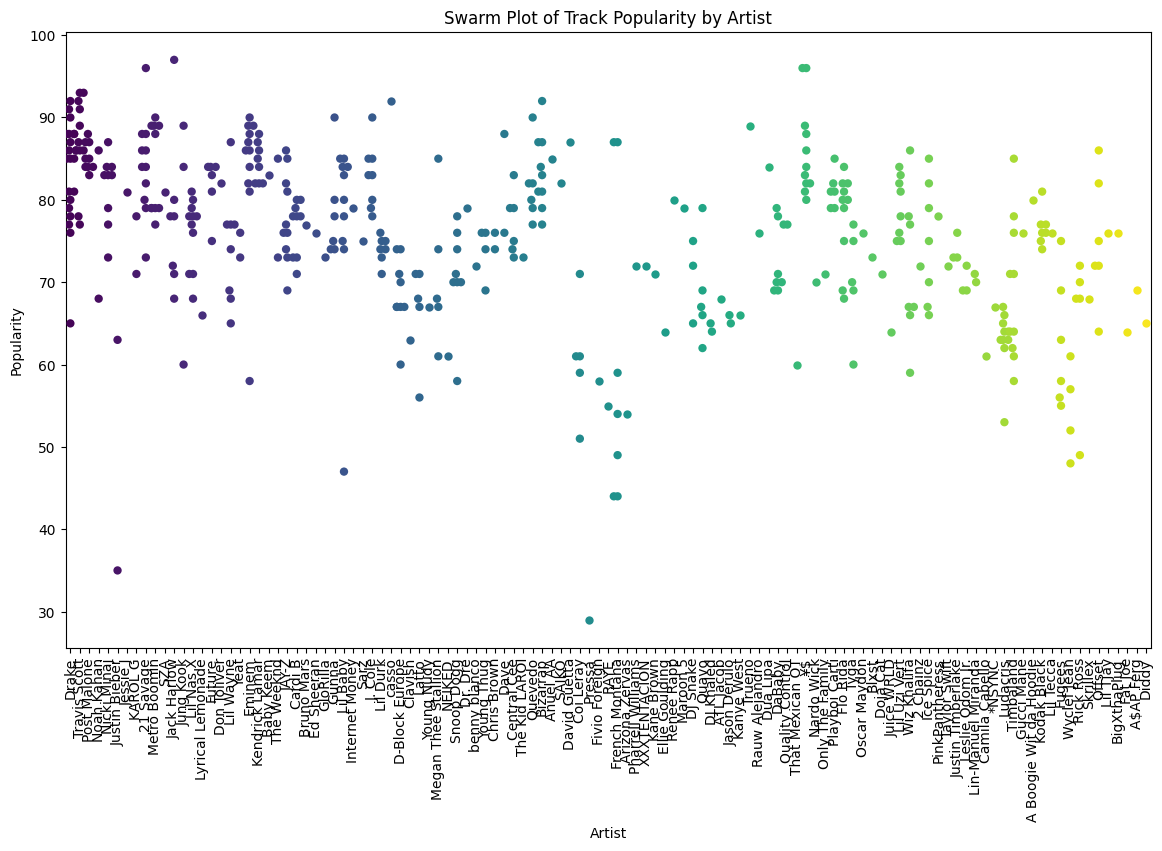

In [98]:
# Create a swarm plot of track popularity by artist
plt.figure(figsize=(14, 8))
sns.swarmplot(x='Artist', y='Popularity', data=df, palette='viridis', size=6)
plt.title('Swarm Plot of Track Popularity by Artist')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=90)
plt.show()
